## Jet Analysis(Nuclear Modification Factor)( $R_{\mathrm{AA}}$)

# Preparations
Please set path of jet data files for both pp and PbPb.
Also if you use jet cone size different from $R=0.4$, please change the value jetR below.

# Loading all the files

In [1]:
# Set File Paths
# Please set the path for pp jet data file
file_pp = '../data/pp100-501/pp19_100-501_vir0.5_sel_995019.dat'
file_pp11 = '../data/ppr_0.2/pp19_R0.2_merge_sel_103987.dat'

# Please set the value of jet cone size you used in the jet reconstruction
jetR = 0.4


In [2]:
# Please set the path for pbpb jet data file
file_pbpb = '../data/final1012/om_final_0-10/om_final_0-10_merge_48k.dat'
# Please set the path for pbpb11 jet data file
file_pbpb11 = '../data/R_0.2_om_final_0-10/R2_om_final_merge_48k.dat'

In [3]:
# preperations
import numpy as np
import matplotlib.pyplot as plt

# pi and 2pi 
pi = 3.1415926
twopi = 2.0*pi

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [7.5, 5.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

In [4]:
def ratio_error(v1,e1,v2,e2):
  #v1, e1: numerator value and error
  #v2, e2: denominator value and error  
  error1 = e1/v2
  error2 = (e2/v2)*(v1/v2)
  error = np.sqrt(error1*error1+error2*error2)
  return error

In [5]:
# Load files
data_pp = np.loadtxt(file_pp, delimiter=',')
data_pp11 = np.loadtxt(file_pp11, delimiter=',')
data_pbpb = np.loadtxt(file_pbpb, delimiter=',')
data_pbpb11 = np.loadtxt(file_pbpb11, delimiter=',')

# Indices of the data array
i_pp = data_pp[:,0] 
i_pp11 = data_pp11[:,0] 
i_pbpb = data_pbpb[:,0] 
i_pbpb11 = data_pbpb11[:,0] 

# Get Indices of jets in the data array
jet_id_pp = np.where(i_pp < 0.1)
jet_id_pp11 = np.where(i_pp11 < 0.1)
jet_id_pbpb = np.where(i_pbpb < 0.1)
jet_id_pbpb11 = np.where(i_pbpb11 < 0.1)

# Extract jets
jets_pp = data_pp[jet_id_pp]
jets_pp11 = data_pp11[jet_id_pp11]
jets_pbpb = data_pbpb[jet_id_pbpb]
jets_pbpb11 = data_pbpb11[jet_id_pbpb11]

# Extract associated charged particles for pp
assoc_pp= []
for i in range(len(jet_id_pp[0])-1):
  chunck = data_pp[jet_id_pp[0][i]+1:jet_id_pp[0][i+1]]
  assoc_pp.append(chunck)
chunck = data_pp[jet_id_pp[0][-1]+1:]
assoc_pp.append(chunck)

# Extract associated charged particles for pp11
assoc_pp11= []
for i in range(len(jet_id_pp11[0])-1):
  chunck = data_pp11[jet_id_pp11[0][i]+1:jet_id_pp11[0][i+1]]
  assoc_pp11.append(chunck)
chunck = data_pp11[jet_id_pp11[0][-1]+1:]
assoc_pp11.append(chunck)

# Extract associated charged particles for pbpb
assoc_pbpb= []
for i in range(len(jet_id_pbpb[0])-1):
  chunck = data_pbpb[jet_id_pbpb[0][i]+1:jet_id_pbpb[0][i+1]]
  assoc_pbpb.append(chunck)
chunck = data_pbpb[jet_id_pbpb[0][-1]+1:]
assoc_pbpb.append(chunck)

# Extract associated charged particles for pbpb11
assoc_pbpb11= []
for i in range(len(jet_id_pbpb11[0])-1):
  chunck = data_pbpb11[jet_id_pbpb11[0][i]+1:jet_id_pbpb11[0][i+1]]
  assoc_pbpb11.append(chunck)
chunck = data_pbpb11[jet_id_pbpb11[0][-1]+1:]
assoc_pbpb11.append(chunck)

# p-p jet-spectra

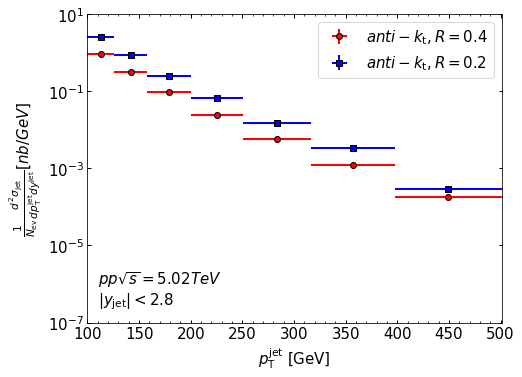

In [6]:
# Prepare arrays of Jet-pT
jet_pt_pp_in = jets_pp[:,1]
jet_pt_pp11_in = jets_pp11[:,1]

#No. of events selected
n_ev_pp = 995019
n_ev_pp11 = 103987

# bin settings
pt_min = 100
pt_max = 501
bins_11 = [100,126,158,200,251,316,398,501]
y_axis11 = [1.1543,0.3131,0.08267,0.02019,0.004644,0.000961,0.000185]

# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins=bins_11 )
n_pp11, pt = np.histogram(jet_pt_pp11_in, bins=bins_11 )


# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pp11 = np.sqrt(n_pp11)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum (Sigma in nb)
sigma = 172.5
d_eta = 5.6
d_eta11 = 2
dn_dpt_pp = (n_pp*sigma)/n_ev_pp/dpt/d_eta
dn_dpt_pp11 = (n_pp11*sigma)/n_ev_pp11/dpt/d_eta11

# Errors 
err_dn_dpt_pp = (err_n_pp*sigma)/n_ev_pp/dpt/d_eta
err_dn_dpt_pp11 = (err_n_pp11*sigma)/n_ev_pp11/dpt/d_eta11

# Generate Plots
fig = plt.figure()

#plt.errorbar(pt, dn_dpt_pp, fmt='o', label="pp",
             #xerr=0.5*dpt, yerr=err_dn_dpt_pp, color='red')


plt.errorbar(pt,dn_dpt_pp,mec='black',fmt='o',label=r"$anti-k_{\mathrm{t}},R=0.4$",xerr=0.5*dpt,
             yerr=err_dn_dpt_pp,color ='red')

plt.errorbar(pt,dn_dpt_pp11,mec='black',fmt='s',label=r"$anti-k_{\mathrm{t}},R=0.2$",xerr=0.5*dpt,
             yerr=err_dn_dpt_pp11,color ='blue')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}[nb/GeV]$")
plt.xlim(pt_min,pt_max)
y_min = 0.0000001
y_max = 10

plt.ylim(y_min,y_max)
plt.text(pt_min+10,y_min*10, r'$pp$' r"$ \sqrt{s}= 5.02 TeV$")
plt.text(pt_min+10,y_min*3,r"$|y_{\mathrm{jet}}|<2.8$")

# save plots
plt.tight_layout()
plt.savefig('n_jet')


# p-p jet-spectra ratio with ATLAS

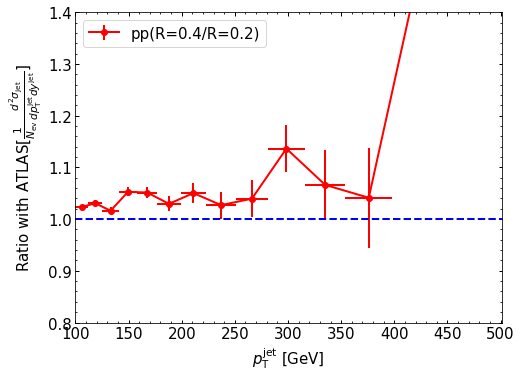

In [13]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
ratio11 = dn_dpt_pp/dn_dpt_pp11
error_ratio11 = ratio_error(dn_dpt_pp11,err_dn_dpt_pp11,dn_dpt_pp,err_dn_dpt_pp)

plt.errorbar(pt, ratio11, marker='o', label="pp(R=0.4/R=0.2)",
             xerr=0.5*dpt, yerr=error_ratio11, color='red')


#axes setting
#plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio with ATLAS" r"$[\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.8,1.4)
plt.legend(loc=0)
#plt.text(pt_min+100,0.76, 'vir=0.5')
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=2.0) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')

# Pb-Pb jet-spectra

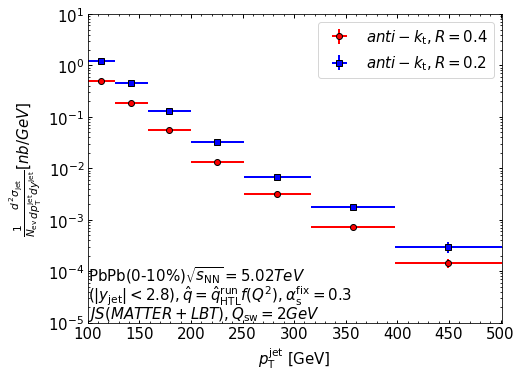

In [8]:
# Prepare arrays of Jet-pT
jet_pt_pbpb_in = jets_pbpb[:,1]
jet_pt_pbpb11_in = jets_pbpb11[:,1]

#No. of analyzed events
n_ev_pbpb = 48000
n_ev_pbpb11 = 48000

# bin settings
pt_min = 100
pt_max = 501
bins_12 = [100,126,158,200,251,316,398,501]

# Fill Histogram
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins=bins_12 )
n_pbpb11, pt = np.histogram(jet_pt_pbpb11_in, bins=bins_12 )

# Statistical Errors
err_n_pbpb = np.sqrt(n_pbpb)
err_n_pbpb11 = np.sqrt(n_pbpb11)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum 
sigma = 172.5
d_eta = 5.6
d_eta11 = 2
dn_dpt_pbpb = (n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
dn_dpt_pbpb11 = (n_pbpb11*sigma)/n_ev_pbpb11/dpt/d_eta11

# Errors 
err_dn_dpt_pbpb = (err_n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
err_dn_dpt_pbpb11 = (err_n_pbpb11*sigma)/n_ev_pbpb11/dpt/d_eta11

# Generate Plots
fig = plt.figure()

plt.errorbar(pt, dn_dpt_pbpb, mec='black', fmt='o', label=r"$anti-k_{\mathrm{t}},R=0.4$",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb, color='red')

plt.errorbar(pt, dn_dpt_pbpb11,  mec='black',fmt='s', label=r"$anti-k_{\mathrm{t}},R=0.2$",
             xerr=0.5*dpt, yerr=err_dn_dpt_pbpb11, color='blue')

#axes setting
plt.yscale('log')
plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}[nb/GeV]$")
plt.xlim(pt_min,pt_max)
y_min = 0.00001
y_max = 10
plt.ylim(y_min,y_max)
plt.text(pt_min,y_min*6.5, r"PbPb(0-10%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min,y_min*2.7,r'$(|y_{\mathrm{jet}}|<2.8),\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$')
plt.text(pt_min,y_min*1.2,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")

# save plots
plt.tight_layout()
plt.savefig('n_jet')


# Pb-Pb jet-spectra ratio with ATLAS

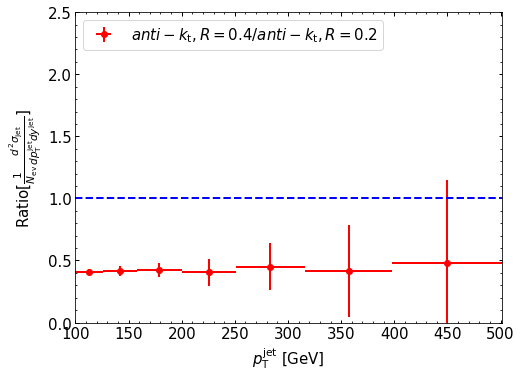

In [9]:
# Generate Plots
fig = plt.figure()

# Calculate Ratio and error
ratio12 = dn_dpt_pbpb/dn_dpt_pbpb11
error_ratio12 = ratio_error(dn_dpt_pbpb11,err_dn_dpt_pbpb11,dn_dpt_pbpb,err_dn_dpt_pbpb)

plt.errorbar(pt, ratio12, fmt='o', label=r"$anti-k_{\mathrm{t}},R=0.4/anti-k_{\mathrm{t}},R=0.2$",
             xerr=0.5*dpt, yerr=error_ratio12, color='red')


#axes setting
plt.legend(loc='upper left')
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio" r"$[\frac{1}{N_{\mathrm{ev}}}\frac{d^{\mathrm{2}}\sigma_{\mathrm{jet}}}{dp^{\mathrm{jet}}_{\mathrm{T}}dy^{\mathrm{jet}}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.0,2.5)
#plt.text(pt_min+600,1.07, '5.02 TeV')
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=2.0) 


# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')

## Jet-$R_{\mathrm{AA}}$

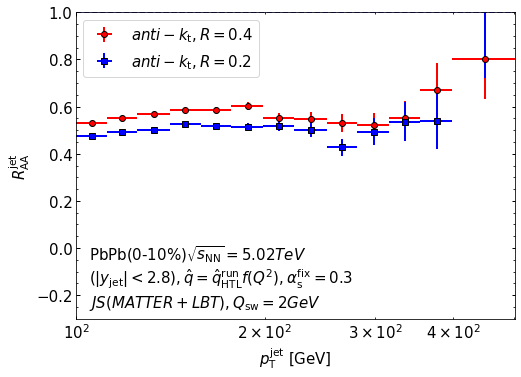

In [10]:
bins_13 = [100,112,125,141,158,177,199,223,251,281,316,354,398,501]


# Fill Histogram
n_pp, pt = np.histogram(jet_pt_pp_in, bins= bins_13 )
n_pp11, pt = np.histogram(jet_pt_pp11_in, bins= bins_13 )
n_pbpb, pt = np.histogram(jet_pt_pbpb_in, bins= bins_13 )
n_pbpb11, pt = np.histogram(jet_pt_pbpb11_in, bins= bins_13 )

# Statistical Errors
err_n_pp = np.sqrt(n_pp)
err_n_pbpb = np.sqrt(n_pbpb)
err_n_pp11 = np.sqrt(n_pp11)
err_n_pbpb11 = np.sqrt(n_pbpb11)

# bin width
dpt = (pt[1:]-pt[:-1])
# bin center
pt = pt[0:-1] + 0.5*dpt

# Jet Spectrum
dn_dpt_pp = (n_pp*sigma)/n_ev_pp/dpt/d_eta
dn_dpt_pbpb = (n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
dn_dpt_pp11 = (n_pp11*sigma)/n_ev_pp11/dpt/d_eta
dn_dpt_pbpb11 = (n_pbpb11*sigma)/n_ev_pbpb11/dpt/d_eta

# Errors 
err_dn_dpt_pp = (err_n_pp*sigma)/n_ev_pp/dpt/d_eta
err_dn_dpt_pbpb = (err_n_pbpb*sigma)/n_ev_pbpb/dpt/d_eta
err_dn_dpt_pp11 = (err_n_pp11*sigma)/n_ev_pp11/dpt/d_eta
err_dn_dpt_pbpb11 = (err_n_pbpb11*sigma)/n_ev_pbpb11/dpt/d_eta

# Generate Plots
fig = plt.figure()

# Calculate RAA and error
raa =  dn_dpt_pbpb/dn_dpt_pp
error_raa = ratio_error(dn_dpt_pbpb,err_dn_dpt_pbpb,dn_dpt_pp,err_dn_dpt_pp)

raa11 =  dn_dpt_pbpb11/dn_dpt_pp11
error_raa11 = ratio_error(dn_dpt_pbpb11,err_dn_dpt_pbpb11,dn_dpt_pp11,err_dn_dpt_pp11)

plt.errorbar(pt, raa, mec='black',fmt='o', label=r"$anti-k_{\mathrm{t}},R=0.4$",
             xerr=0.5*dpt, yerr=error_raa, color='red')

plt.errorbar(pt, raa11,mec='black', fmt='s', label=r"$anti-k_{\mathrm{t}},R=0.2$",
             xerr=0.5*dpt, yerr=error_raa11, color='blue')


#axes setting
plt.legend(loc='upper left')
plt.xscale('log')
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel(r"$R^{\mathrm{jet}}_{\mathrm{AA}}$")
plt.xlim(pt_min,pt_max)
plt.ylim(-0.3,1.0)
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=1.5) 
plt.text(pt_min+5,-0.05, r"PbPb(0-10%)"r"$\sqrt{s_{\mathrm{NN}}}=5.02 TeV$")
plt.text(pt_min+5,-0.15,r'$(|y_{\mathrm{jet}}|<2.8),\hat{q}=\hat{q}^{\mathrm{run}}_{\mathrm{HTL}}f(Q^{\mathrm{2}}),\alpha^{\mathrm{fix}}_{\mathrm{s}}=0.3$')
plt.text(pt_min+5,-0.25,r"$JS(MATTER+LBT),Q_{\mathrm{sw}}=2GeV$")

# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')

## Jet-$R_{\mathrm{AA}}$ ratio with ATLAS

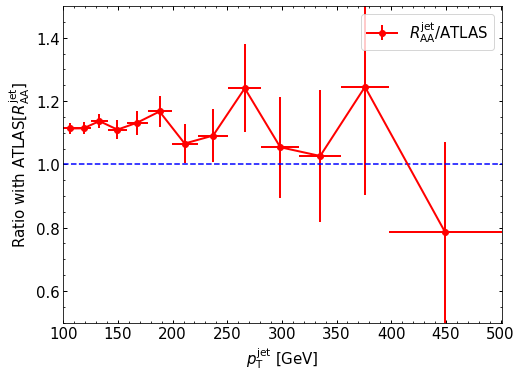

In [11]:
# Generate Plots
fig = plt.figure()

# Calculate RAA and error
ratio14 = raa/raa11
error_raa = ratio_error(raa,error_raa,raa11,error_raa11)

plt.errorbar(pt, ratio14, marker='o', label= r"$R^{\mathrm{jet}}_{\mathrm{AA}}$/ATLAS",
             xerr=0.5*dpt, yerr=error_raa, color='red')


#axes setting
#plt.legend(loc=0)
plt.xlabel(r"$p^{\mathrm{jet}}_{\mathrm{T}}$ [GeV]")
plt.ylabel("Ratio with ATLAS" r"$[R^{\mathrm{jet}}_{\mathrm{AA}}]$")
plt.xlim(pt_min,pt_max)
plt.ylim(0.5,1.5)
plt.legend(loc=0)
#plt.text(pt_min+100,0.76, 'vir=0.5')
plt.axhline(1, color = "blue", linestyle="dashed", linewidth=1.5) 

# save plot to the Desktop
plt.tight_layout()
plt.savefig('raa')